## **Install and Import Dependancies**

In [88]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://download.pytorch.org/whl/cu117, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## **Read the Images**

In [91]:
image_path = '/content/o1.jpg'

In [92]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_path)
print(result)
print(len(result))

[([[108, 92], [320, 92], [320, 144], [108, 144]], 'Small Text', 0.9987673394147564)]
1


## **Draw and Visualise Results**

### **Handle Single Lines.**

In [93]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

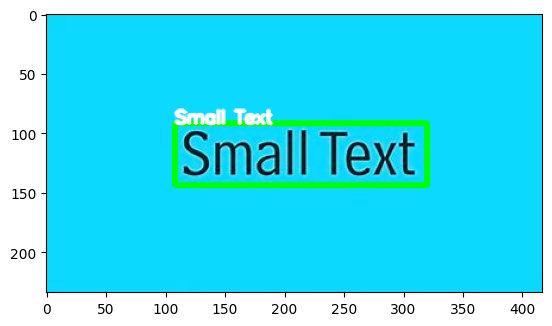

In [94]:
img = cv2.imread(image_path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

### **Handle Multiple Lines**

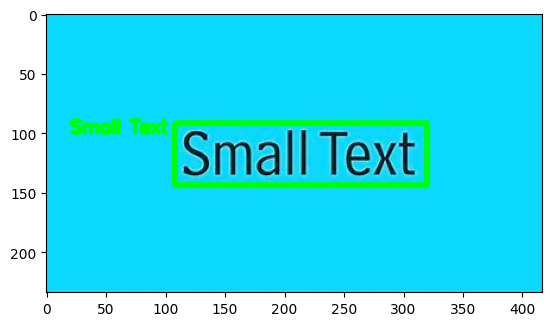

In [95]:
img = cv2.imread(image_path)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()

## **Combining the multi line and single line text recognition.**

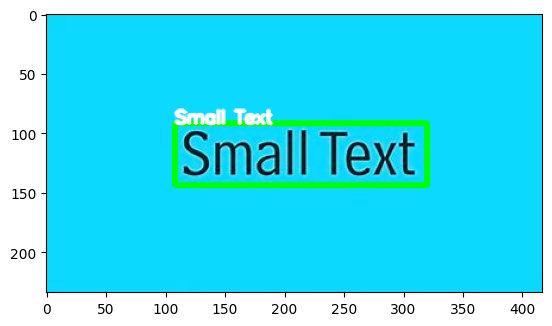

In [96]:
if (len(result)>1):
  img = cv2.imread(image_path)
  spacer = 100
  for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

  plt.imshow(img)
  plt.show()
else:
  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])
  text = result[0][1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.imread(image_path)
  img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
  img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
  plt.imshow(img)
  plt.show()
